# Plot up timeseries of CO2 pulled from the input4MIPs/CMIP6 forcing collection

## Notes

**Summary**

Qucik and dirty notebook to extract data from CMIP6 input4MIP data files and plot

**Authors**

Paul J. Durack ([durack1](https://github.com/durack1); [PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

**Notes**

PJD 17 Dec 2024 - Started - in reply to Ben S.

**Links**

## imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xcdat as xc

## where am i

In [2]:
os.getcwd()

'/home/durack1/git/dotfiles'

## files

In [3]:
histPath = "/p/user_pub/work/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/mole-fraction-of-carbon-dioxide-in-air/gr1-GMNHSH/v20160830/"
histFile = os.path.join(histPath, "mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc")
fH = xc.open_dataset(histFile, decode_times=False)

In [4]:
futPath = "/p/user_pub/work/input4MIPs/CMIP6/ScenarioMIP/UoM/UoM-REMIND-MAGPIE-ssp585-1-2-1/atmos/yr/mole_fraction_of_carbon_dioxide_in_air/gr1-GMNHSH/v20181127/"
futFile = os.path.join(futPath, "mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_ScenarioMIP_UoM-REMIND-MAGPIE-ssp585-1-2-1_gr1-GMNHSH_2015-2500.nc")
fF = xc.open_dataset(futFile, decode_times=False)

In [5]:
fH

<xarray.Dataset> Size: 65kB
Dimensions:                                 (time: 2015, bound: 2, sector: 3)
Coordinates:
  * time                                    (time) float32 8kB 183.0 ... 7.35...
  * sector                                  (sector) int32 12B 0 1 2
Dimensions without coordinates: bound
Data variables:
    time_bnds                               (time, bound) float64 32kB ...
    sector_bnds                             (sector, bound) float64 48B ...
    mole_fraction_of_carbon_dioxide_in_air  (time, sector) float32 24kB ...
Attributes: (12/26)
    Conventions:             CF-1.6
    comment:                 Data provided are global and hemispheric area-we...
    variable_id:             mole_fraction_of_carbon_dioxide_in_air
    product:                 assimilated observations
    creation_date:           2016-08-30T18:24:56Z
    frequency:               yr
    ...                      ...
    contact:                 malte.meinshausen@unimelb.edu.au
    table_id:                input4MIPs
    source_id:               UoM-CMIP-1-2-0
    institution:             Australian-German Climate & Energy College, The ...
    tracking_id:             hdl:21.14100/18da2d96-a1e4-40f4-9bd5-0a435ff78e55
    nominal_resolution:      10000 km

In [6]:
fH.mole_fraction_of_carbon_dioxide_in_air[:,0].data[1:15]

array([277.137, 277.16 , 277.158, 277.157, 277.167, 277.172, 277.171,
       277.175, 277.176, 277.179, 277.194, 277.198, 277.201, 277.201],
      dtype=float32)

In [7]:
fF

<xarray.Dataset> Size: 23kB
Dimensions:                                 (time: 486, bound: 2, sector: 3)
Coordinates:
  * time                                    (time) float64 4kB 6.041e+04 ... ...
  * sector                                  (sector) int64 24B 0 1 2
Dimensions without coordinates: bound
Data variables:
    time_bnds                               (time, bound) float64 8kB ...
    sector_bnds                             (sector, bound) float64 48B ...
    mole_fraction_of_carbon_dioxide_in_air  (time, sector) float64 12kB ...
Attributes: (12/26)
    title:               UoM-REMIND-MAGPIE-ssp585-1-2-1: REMIND-MAGPIE-ssp585...
    institution_id:      UoM
    dataset_category:    GHGConcentrations
    source_version:      1.2.1
    institution:         Australian-German Climate & Energy College, The Univ...
    activity_id:         input4MIPs
    ...                  ...
    references:          Malte Meinshausen, Zebedee Nicholls, et al. Future s...
    grid:                global and hemispheric means - area-averages from th...
    grid_label:          gr1-GMNHSH
    nominal_resolution:  10000 km
    variable_id:         mole_fraction_of_carbon_dioxide_in_air
    comment:             Note: Zonal means for 15-degree lat bands or 0.5-deg...

In [8]:
fF.mole_fraction_of_carbon_dioxide_in_air[:,0].data[1:15]

array([403.11697388, 405.79397583, 408.75994873, 411.78994751,
       414.89096069, 418.06497192, 421.33496094, 424.72094727,
       428.21994019, 431.82995605, 435.54995728, 439.37796021,
       443.31494141, 447.36096191])

## combine and plot

In [9]:
newCO2 = np.concatenate((fH.mole_fraction_of_carbon_dioxide_in_air[:,0], fF.mole_fraction_of_carbon_dioxide_in_air[:,0]))

In [10]:
newCO2

array([ 277.45401001,  277.13699341,  277.16000366, ..., 2011.01000977,
       2010.35998535, 2010.02001953])

In [11]:
newCO2.shape

(2501,)

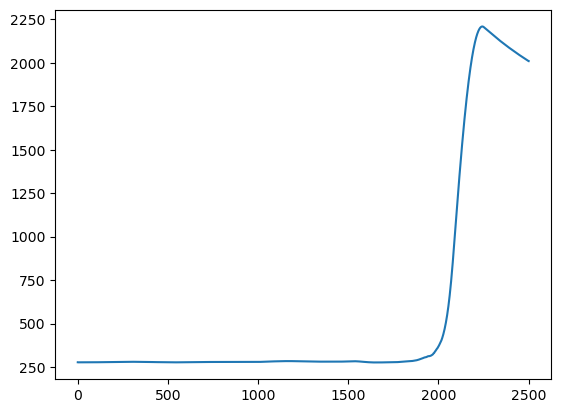

In [12]:
plt.plot(np.arange(0,2501), newCO2)